# Notebook
Beginning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import joblib 

2024-10-28 21:54:33.967064: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 21:54:33.970977: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 21:54:33.983493: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730152474.002907    7631 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730152474.008381    7631 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 21:54:34.026756: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# Data Collection
- Read raw data from csv file.  
- Preview the raw data. 
- Scan the data for anomalies and empty values.

We are choosing to only gather data from the 2017 season onwards as that provides the full data coverage from which we wish to learn from.

In [2]:
data = pd.read_csv('data/fulldata.csv')
data = data.drop(columns=['Unnamed: 0'])
data

Season         HomeTeam         AwayTeam  FTR  home_Gls  home_Ast  \
0     2017-18          Arsenal   Leicester City    0  1.921053  1.605263   
1     2017-18         Brighton  Manchester City    2  0.868421  0.657895   
2     2017-18          Chelsea          Burnley    2  1.578947  1.105263   
3     2017-18   Crystal Palace     Huddersfield    2  1.157895  0.684211   
4     2017-18          Everton       Stoke City    0  1.105263  0.684211   
...       ...              ...              ...  ...       ...       ...   
1824  2021-22      Aston Villa        Tottenham    2  1.315789  1.105263   
1825  2021-22        Brentford         West Ham    0  1.210526  0.868421   
1826  2021-22   Leicester City   Crystal Palace    0  1.631579  1.210526   
1827  2021-22     Norwich City          Burnley    0  0.552632  0.421053   
1828  2021-22  Manchester City        Liverpool    1  2.526316  1.657895   

      home_CrdY  home_CrdR  home_PrgC  home_PrgP  ...   away_Int   away_Clr  \
0           NaN        NaN  24.078947  58.500000  ...  10.894737  26.500000   
1           NaN        NaN  13.763158  32.368421  ...   9.105263  16.315789   
2           NaN        NaN  27.500000  52.578947  ...  10.526316  34.210526   
3           NaN        NaN  19.131579  34.421053  ...  13.631579  29.710526   
4           NaN        NaN  12.552632  30.552632  ...  12.131579  33.289474   
...         ...        ...        ...        ...  ...        ...        ...   
1824   2.131579   0.052632  17.184211  34.210526  ...   9.342105  20.868421   
1825   1.710526   0.078947  11.842105  31.289474  ...   9.842105  20.552632   
1826   1.447368   0.026316  16.368421  35.684211  ...   8.763158  20.026316   
1827   1.500000   0.026316  14.894737  27.131579  ...  10.789474  23.342105   
1828   1.105263   0.026316  30.131579  63.710526  ...   8.947368  13.763158   

      away_Err  away_Poss   away_Fls   away_Fld  away_Off  away_PKwon  \
0     0.447368       48.0   9.578947   9.394737  2.421053    0.157895   
1     0.500000       71.0   9.052632   9.315789  1.763158    0.210526   
2     0.210526       43.7   9.210526  11.105263  2.631579    0.000000   
3     0.578947       45.7  10.447368   9.552632  1.763158    0.052632   
4     0.526316       41.4  11.473684   9.868421  2.289474    0.052632   
...        ...        ...        ...        ...       ...         ...   
1824  0.394737       51.8  10.157895  10.684211  1.631579    0.078947   
1825  0.131579       47.9   8.500000   7.263158  1.552632    0.078947   
1826  0.131579       51.1  10.894737  12.657895  1.657895    0.157895   
1827  0.473684       40.2  10.368421   8.736842  2.657895    0.052632   
1828  0.210526       62.7   9.552632   7.526316  1.657895    0.131579   

      away_PKcon  away_Recov  
0       0.105263   56.684211  
1       0.052632   55.368421  
2       0.131579   49.342105  
3       0.157895   56.342105  
4       0.131579   48.210526  
...          ...         ...  
1824    0.052632   49.815789  
1825    0.157895   51.842105  
1826    0.105263   55.342105  
1827    0.131579   53.342105  
1828    0.000000   59.605263  

[1829 rows x 56 columns]

In [3]:
# There exists an entire seasons worth of data missing red/yellow card information, does these columns should be dropped from trianing models
data.isnull().sum()

Season           0
HomeTeam         0
AwayTeam         0
FTR              0
home_Gls         0
home_Ast         0
home_CrdY      380
home_CrdR      380
home_PrgC        0
home_PrgP        0
home_Saves       0
home_Sh          0
home_SoT         0
home_FK          0
home_TB          0
home_Sw          0
home_Crs         0
home_CK          0
home_TklW        0
home_Blocks      0
home_Int         0
home_Clr         0
home_Err         0
home_Poss        0
home_Fls         0
home_Fld         0
home_Off         0
home_PKwon       0
home_PKcon       0
home_Recov       0
away_Gls         0
away_Ast         0
away_CrdY      380
away_CrdR      380
away_PrgC        0
away_PrgP        0
away_Saves       0
away_Sh          0
away_SoT         0
away_FK          0
away_TB          0
away_Sw          0
away_Crs         0
away_CK          0
away_TklW        0
away_Blocks      0
away_Int         0
away_Clr         0
away_Err         0
away_Poss        0
away_Fls         0
away_Fld         0
away_Off    

In [4]:
data = data.drop(columns=['home_CrdY','home_CrdR','away_CrdY','away_CrdR'])
data.isnull().sum()

Season         0
HomeTeam       0
AwayTeam       0
FTR            0
home_Gls       0
home_Ast       0
home_PrgC      0
home_PrgP      0
home_Saves     0
home_Sh        0
home_SoT       0
home_FK        0
home_TB        0
home_Sw        0
home_Crs       0
home_CK        0
home_TklW      0
home_Blocks    0
home_Int       0
home_Clr       0
home_Err       0
home_Poss      0
home_Fls       0
home_Fld       0
home_Off       0
home_PKwon     0
home_PKcon     0
home_Recov     0
away_Gls       0
away_Ast       0
away_PrgC      0
away_PrgP      0
away_Saves     0
away_Sh        0
away_SoT       0
away_FK        0
away_TB        0
away_Sw        0
away_Crs       0
away_CK        0
away_TklW      0
away_Blocks    0
away_Int       0
away_Clr       0
away_Err       0
away_Poss      0
away_Fls       0
away_Fld       0
away_Off       0
away_PKwon     0
away_PKcon     0
away_Recov     0
dtype: int64

# Data Processing
- Scaling the data so that it is normalised
- Applying PCA for the SVM

In [5]:
trainTestData = data.drop(columns=['HomeTeam','AwayTeam','Season','FTR'])
labels = data['FTR']

scaler = StandardScaler()
scaler.fit(trainTestData)
scaledData = pd.DataFrame(scaler.transform(trainTestData))

In [6]:
pca = PCA(n_components=10)
pca.fit(scaledData)
pcaScaledData = pca.fit_transform(scaledData)

# Model Training
Begin by splitting the data into training and testing sets

In [7]:
trainData, testData, trainLabels, testLabels = train_test_split(scaledData, labels, 
                                                                test_size=0.2)

trainDataPCA, testDataPCA, trainLabelsPCA, testLabelsPCA = train_test_split(pcaScaledData, labels, 
                                                                test_size=0.2)

modelresults = pd.DataFrame()

## Support Vector Machine
Using the RBF kernel we train and test and SVM model

In [8]:

svm = SVC(kernel='rbf', C=1, max_iter=-1).fit(trainDataPCA, trainLabelsPCA)
predResults = svm.predict(testDataPCA)


svmTrainScore = svm.score(trainDataPCA, trainLabelsPCA)
svmTestScore = svm.score(testDataPCA, testLabelsPCA)

print("Train Accuracy = ", svmTrainScore*100, '%')
print("Test Accuracy = ", svmTestScore*100,'%')
svmCM = pd.DataFrame(confusion_matrix(testLabelsPCA, predResults))
svmCM

Train Accuracy =  57.0745044429255 %
Test Accuracy =  55.46448087431693 %


0  1   2
0  133  1  31
1   55  1  35
2   41  0  69

## Logistic Regression
Using grid search on possible parameter combinations \
Model is then fitted, trained and evaluated.

In [9]:
lr_param_grid = {
    'multi_class' : ['multinomial'],
    'solver' : ['lbfgs', 'newton-cg', 'sag'],
    'penalty' : ['none', 'l2'],
    'fit_intercept' : [True, False],
    'max_iter' : [1000]
}

lrGridSearch = LogisticRegression()
lr_grid = GridSearchCV(estimator=lrGridSearch, param_grid=lr_param_grid, cv=5, verbose=2, n_jobs=-1)
lr_grid.fit(trainData, trainLabels)
lr_params = lr_grid.best_params_
lr_params

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=sag; total time=   0.0s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=sag; total time=   0.0s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=sag; total time=   0.0s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=sag; total time=   0.0s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=sag; total time=   0.0s


/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.1s


/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/wo

[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.2s


/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/wo

[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.0s[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s

[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=newton-cg; total time=   0.0s


/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/wo

[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l2, solver=sag; total time=  -1.1s
[CV] END fit_intercept=False, max_iter=1000, multi_class=multino

/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/wo

[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=none, solver=newton-cg; total time=   0.0s[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s

[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.1s
[CV] END fit_intercept=False, max_iter=1000, multi_class=mult

/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/wo

{'fit_intercept': True,
 'max_iter': 1000,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [10]:
lr = LogisticRegression(multi_class='multinomial', solver=lr_params['solver'], penalty=lr_params['penalty'],
                        max_iter=1000)
lr.fit(trainData, trainLabels)
predLR = lr.predict(testData)

lrTrainScore = lr.score(trainData, trainLabels)
lrTestScore = lr.score(testData, testLabels)

print("Train Accuracy = ", lrTrainScore)
print("Test Accuracy = ", lrTestScore)

lrCM = pd.DataFrame(confusion_matrix(testLabels, predLR))
lrCM

Train Accuracy =  0.5768967874231032
Test Accuracy =  0.505464480874317


/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0  1   2
0  100  5  38
1   47  8  31
2   52  8  77

## Random Forest Classifier
Randomised search is first employed to narrow down possible param combinations \
Grid search conducts a thourough comparison of all param combinations \
Model is then fitted, trained and evaluated


In [11]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(trainData, trainLabels)
r_params = rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   1.6s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=170; total time=   1.9s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=170; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   2.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators

In [12]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = r_params['n_estimators']-5, stop = r_params['n_estimators']+4, num = 10)],
    'max_features': [r_params['max_features']],
    'max_depth': [int(x) for x in np.linspace(start = r_params['max_depth']-5, stop = r_params['max_depth']+4, num = 5)],
    'min_samples_split':[int(x) for x in np.linspace(start = r_params['min_samples_split']-2, stop = r_params['min_samples_split']+2, num = 3)],
    'min_samples_leaf': [int(x) for x in np.linspace(start = r_params['min_samples_leaf']-1, stop = r_params['min_samples_leaf']+1, num = 3)],
    'bootstrap': [r_params['bootstrap']]
}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 3, verbose=2, n_jobs = -1)
rf_grid.fit(trainData,trainLabels)
g_params = rf_grid.best_params_
g_params

Fitting 3 folds for each of 450 candidates, totalling 1350 fits
[CV] END bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=55; total time=   0.4s
[CV] END bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=55; total time=   0.4s
[CV] END bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=55; total time=   0.4s
[CV] END bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=56; total time=   0.4s
[CV] END bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=56; total time=   0.4s
[CV] END bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=56; total time=   0.4s
[CV] END bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=57; total time

/home/alex/workspace/predicting-football-matches/.venv/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'bootstrap': True,
 'max_depth': 94,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 55}

In [13]:
rf_final = RandomForestClassifier(n_estimators=g_params['n_estimators'], max_depth=g_params['max_depth'], 
                                  max_features=g_params['max_features'], min_samples_leaf=g_params['min_samples_leaf'], 
                                  min_samples_split=g_params['min_samples_split'], bootstrap=g_params['bootstrap'])
rf_final.fit(trainData, trainLabels)
predrf_final = rf_final.predict(testData)

rf_finalTrainScore = rf_final.score(trainData, trainLabels)
rf_finalTestScore = rf_final.score(testData, testLabels)

print("Train Accuracy = ", rf_finalTrainScore)
print("Test Accuracy = ", rf_finalTestScore)

rfCM = pd.DataFrame(confusion_matrix(testLabels, predrf_final))
rfCM

Train Accuracy =  0.8168147641831852
Test Accuracy =  0.5245901639344263


0   1   2
0  100   9  34
1   46  13  27
2   49   9  79

## Artificial Neural Network
Compare 3 different sized models: Small, medium and large \
Select the best performing one and employ techniques to prevent overfitting \
Fit, train and test model over 100 epochs

In [14]:
def compile_and_fit(model, name) :
    model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())
    
    history = model.fit(trainData, trainLabels, epochs=200, validation_split=0.4, verbose=0)
    return [history, model]

In [15]:
size_histories = {}

small_model = tf.keras.Sequential([
    tf.keras.layers.Dense(48, activation=tf.nn.relu),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(trainLabels)), activation=tf.nn.softmax)
])
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

medium_model = tf.keras.Sequential([
    tf.keras.layers.Dense(48, activation=tf.nn.relu),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(trainLabels)), activation=tf.nn.softmax)
])
size_histories['Medium']  = compile_and_fit(medium_model, "sizes/Medium")

large_model = tf.keras.Sequential([
    tf.keras.layers.Dense(48, activation=tf.nn.relu),
    tf.keras.layers.Dense(48, activation=tf.nn.relu),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(trainLabels)), activation=tf.nn.softmax)
])
size_histories['Large']  = compile_and_fit(large_model, "sizes/Large")

2024-10-28 21:56:31.235766: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=<SparseCategoricalAccuracy name=sparse_categorical_accuracy> of type <class 'keras.src.metrics.accuracy_metrics.SparseCategoricalAccuracy'>

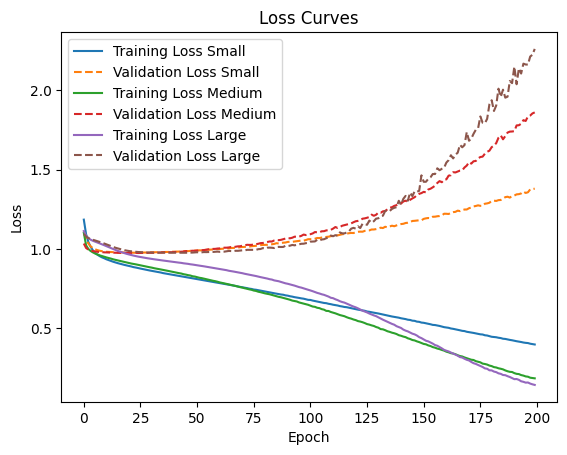

In [55]:
plt.plot(size_histories['Small'][0].history['loss'])
plt.plot(size_histories['Small'][0].history['val_loss'], '--')
plt.plot(size_histories['Medium'][0].history['loss'])
plt.plot(size_histories['Medium'][0].history['val_loss'], '--')
plt.plot(size_histories['Large'][0].history['loss'])
plt.plot(size_histories['Large'][0].history['val_loss'], '--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss Small',
           'Validation Loss Small',
           'Training Loss Medium',
           'Validation Loss Medium',
           'Training Loss Large',
           'Validation Loss Large']
           )
plt.title('Loss Curves')
plt.show()

In [56]:
dropout_model = tf.keras.Sequential([
    tf.keras.layers.Dense(48, input_shape=(48,), activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(len(np.unique(trainLabels)), activation=tf.nn.softmax)
])
size_histories['Medium-Dropout']  = compile_and_fit(dropout_model, "sizes/Medium")

c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [57]:
size_histories['Medium-Dropout'][1].summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 48)                2352      
                                                                 
 dropout_4 (Dropout)         (None, 48)                0         
                                                                 
 dense_33 (Dense)            (None, 24)                1176      
                                                                 
 dropout_5 (Dropout)         (None, 24)                0         
                                                                 
 dense_34 (Dense)            (None, 24)                600       
                                                                 
 dense_35 (Dense)            (None, 3)                 75        
                                                                 
Total params: 4,203
Trainable params: 4,203
Non-traina

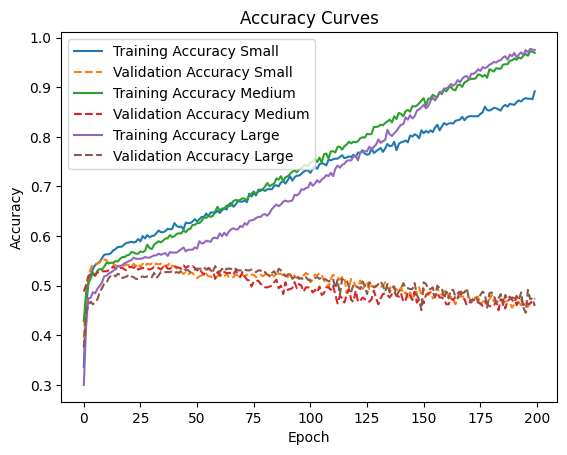

In [58]:
plt.plot(size_histories['Small'][0].history['sparse_categorical_accuracy'])
plt.plot(size_histories['Small'][0].history['val_sparse_categorical_accuracy'], '--')
plt.plot(size_histories['Medium'][0].history['sparse_categorical_accuracy'])
plt.plot(size_histories['Medium'][0].history['val_sparse_categorical_accuracy'], '--')
plt.plot(size_histories['Large'][0].history['sparse_categorical_accuracy'])
plt.plot(size_histories['Large'][0].history['val_sparse_categorical_accuracy'], '--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy Small',
           'Validation Accuracy Small',
           'Training Accuracy Medium',
           'Validation Accuracy Medium',
           'Training Accuracy Large',
           'Validation Accuracy Large']
           )
plt.title('Accuracy Curves')
plt.show()

In [59]:


model = tf.keras.Sequential([
    tf.keras.layers.Dense(48, input_shape=(48,), activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(len(np.unique(trainLabels)), activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())
    
history = model.fit(trainData, trainLabels, epochs=100, validation_split=0.4, verbose=0)

annTrainScore = model.evaluate(trainData, trainLabels, verbose=0)
annTestScore = model.evaluate(testData, testLabels, verbose=0)

print("Train Accuracy = ", annTrainScore[1])
print("Test Accuracy = ", annTestScore[1])

predANN = model.predict(x=testData, batch_size=10, verbose=0)
rounded_predANN = np.argmax(predANN, axis=-1)
annCM = pd.DataFrame(confusion_matrix(testLabels, rounded_predANN))
annCM

c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Train Accuracy =  0.581681489944458
Test Accuracy =  0.5491803288459778


0  1   2
0  118  0  33
1   50  1  29
2   52  1  82

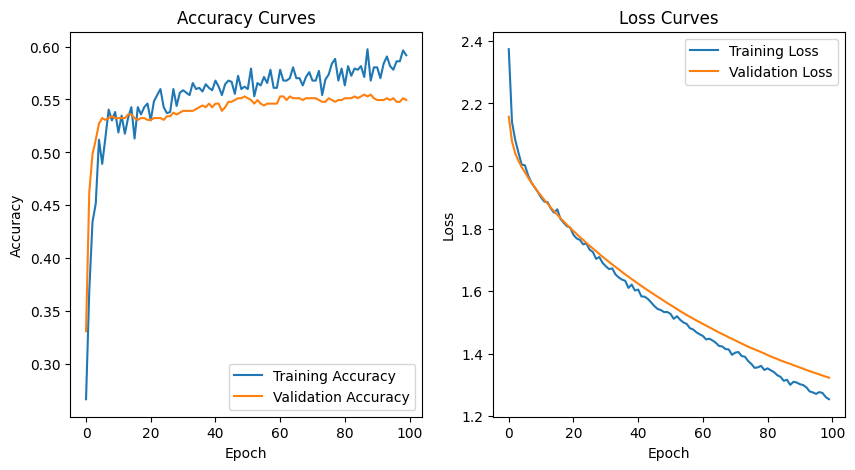

In [60]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

# Evaluation
Visually compare the performance of all models \
Select the best one and export to a saved file.

In [61]:
s = {'Model' : ['SVM', 'LR', 'RFC', 'ANN', 'SVM', 'LR', 'RFC', 'ANN'],
     'Accuracy' : [svmTrainScore, lrTrainScore, rf_finalTrainScore, annTrainScore[1], svmTestScore, lrTestScore, rf_finalTestScore, annTestScore[1]],
     'Type' : ['train','train','train','train','test','test','test','test',],
    
}
modelsAcc = pd.DataFrame(data=s)
modelsAcc

Model  Accuracy   Type
0   SVM  0.585099  train
1    LR  0.569378  train
2   RFC  0.807245  train
3   ANN  0.581681  train
4   SVM  0.535519   test
5    LR  0.535519   test
6   RFC  0.540984   test
7   ANN  0.549180   test

In [62]:
alt.Chart(modelsAcc).mark_bar().encode(
    x='Type:N',
    y='Accuracy:Q',
    color='Type:N',
    column='Model:N'
)

c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

Text(792.3131313131312, 0.5, 'Actual')

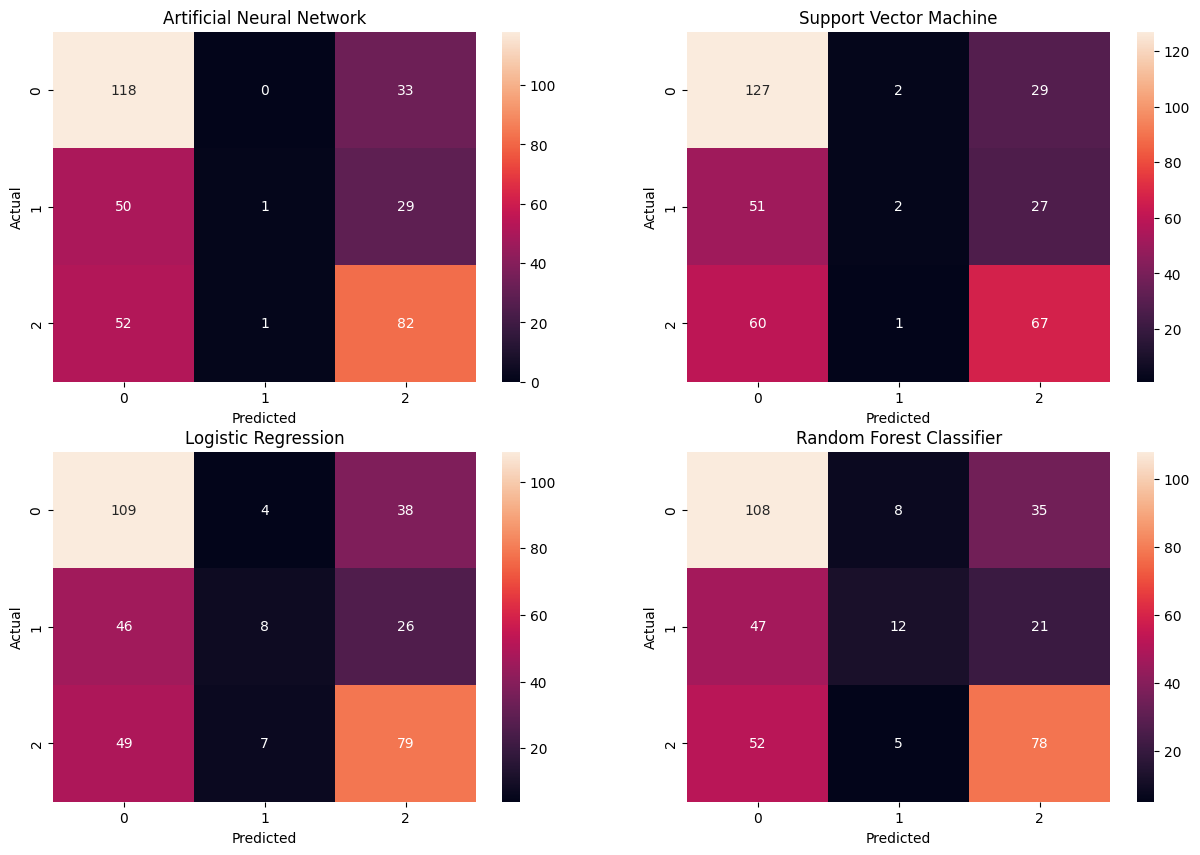

In [63]:
figure, axes = plt.subplots(2, 2, figsize = (15, 10))
sns.heatmap(annCM, annot=True, fmt='.4g', ax=axes[0,0])
sns.heatmap(svmCM, annot=True, fmt='.4g', ax=axes[0,1])
sns.heatmap(lrCM, annot=True, fmt='.4g', ax=axes[1,0])
sns.heatmap(rfCM, annot=True, fmt='.4g', ax=axes[1,1])
axes[0,0].set_title('Artificial Neural Network')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

axes[0,1].set_title('Support Vector Machine')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

axes[1,0].set_title('Logistic Regression')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

axes[1,1].set_title('Random Forest Classifier')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')


In [64]:
filename = '../project/models/randomtree.sav'
joblib.dump(rf_final, filename='../project/models/randomtree.sav')
joblib.dump(lr, filename='../project/models/logisticreg.sav')
joblib.dump(svm, filename='../project/models/supportvector.sav')
model.save('../project/models/ann')

INFO:tensorflow:Assets written to: ../project/models/ann\assets


INFO:tensorflow:Assets written to: ../project/models/ann\assets
